In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="api_key_here")
project = rf.workspace("project-u0r7n").project("potato-plants-diseases")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!pip install ultralytics==8.0.196

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 31.3 MB/s eta 0:00:00


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=20 imgsz=640 plots=True

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


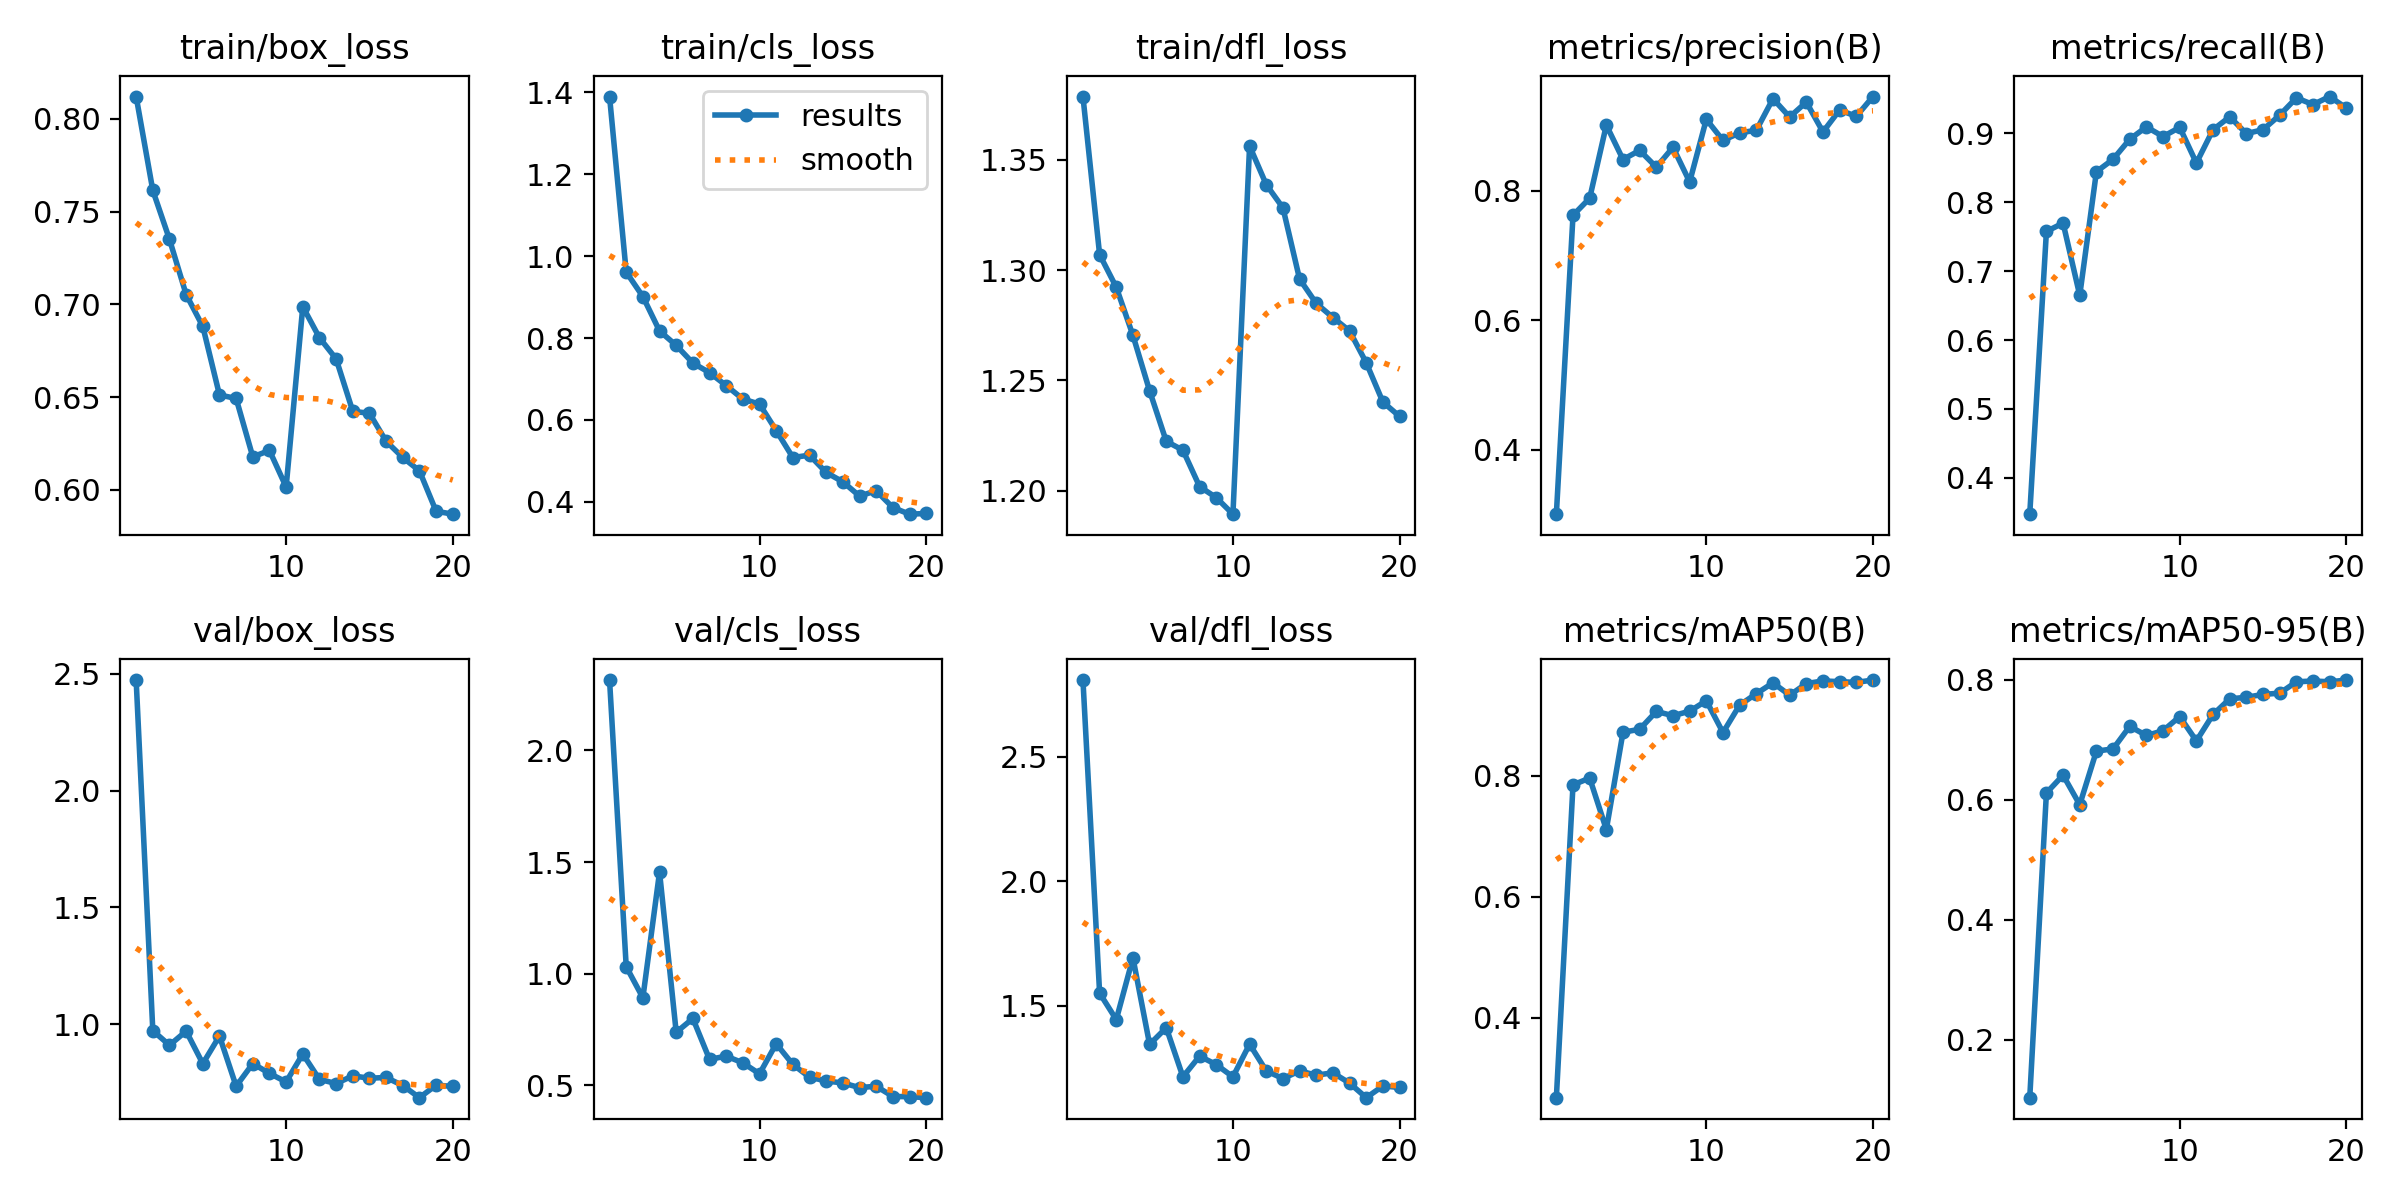

In [ ]:
import os
from IPython.display import Image

# Define HOME variable
HOME = os.getcwd()  # Get the current working directory

# Verify the file path
image_path = f'{HOME}/runs/detect/train4/results.png'
if os.path.exists(image_path):
    # Display the image
    display(Image(filename=image_path, width=600))
else:
    print(f"File not found: {image_path}")


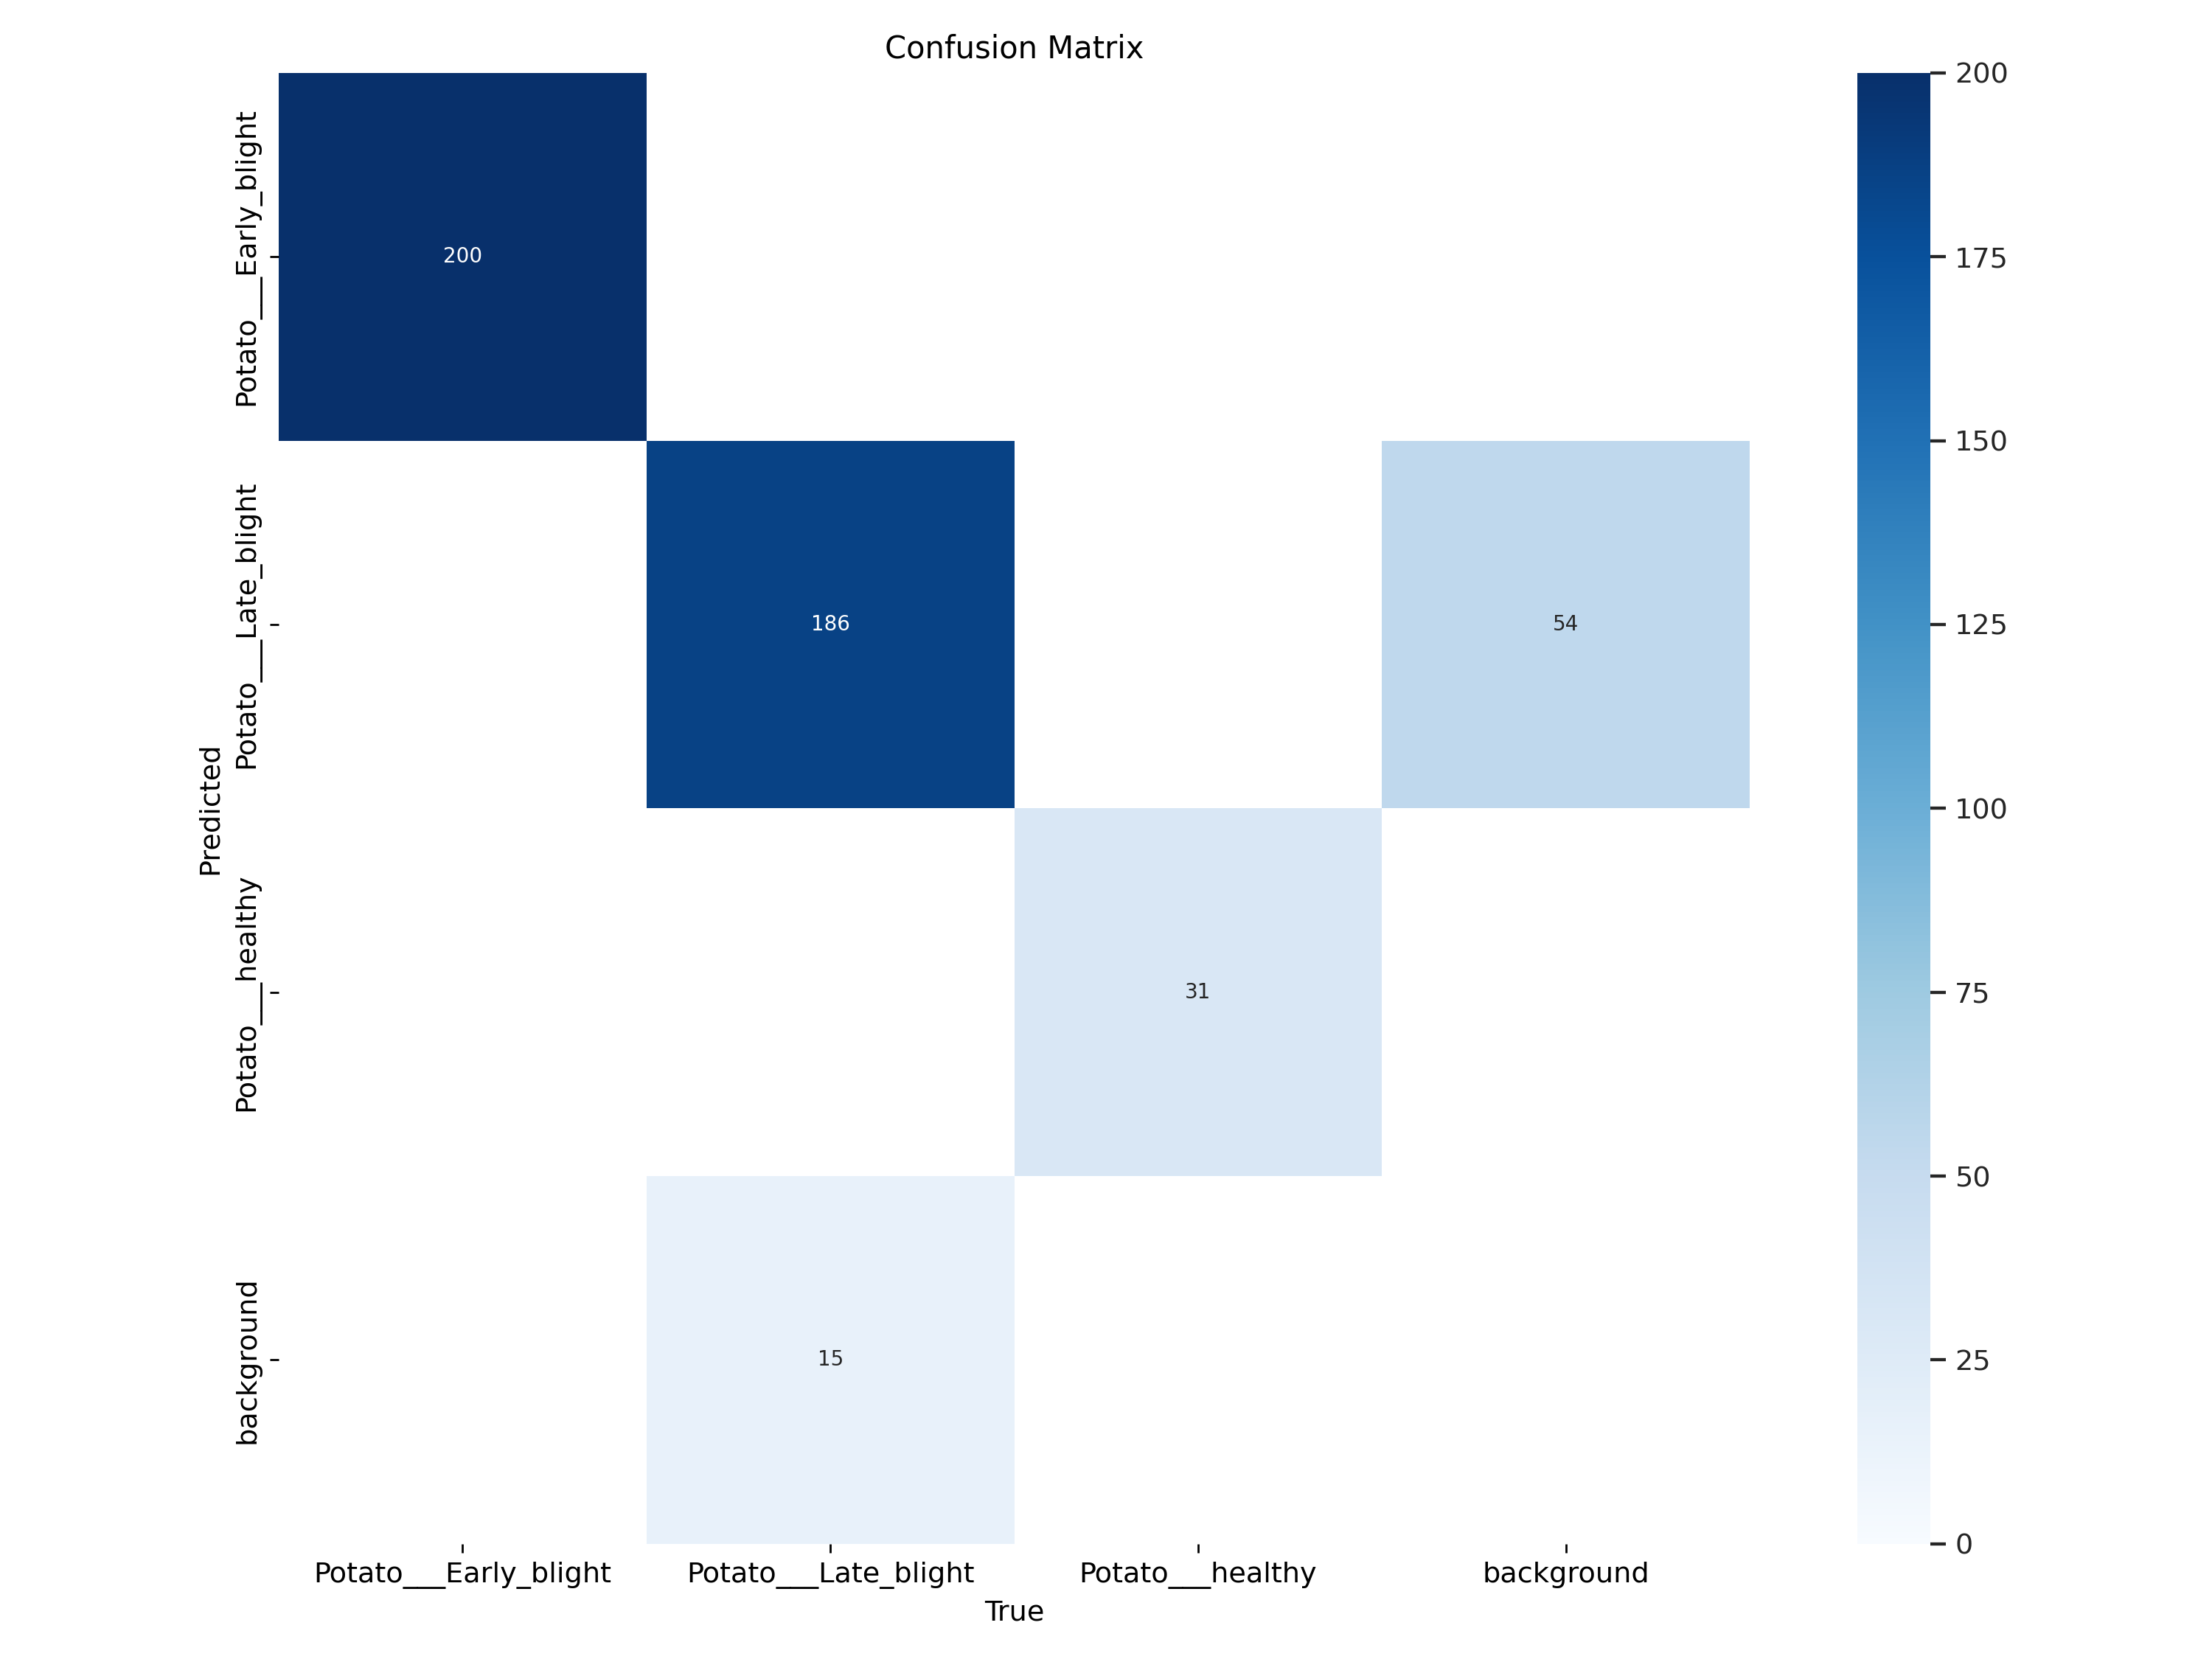

In [ ]:
# Verify the file path
image_path = f'{HOME}/runs/detect/train4/confusion_matrix.png'
if os.path.exists(image_path):
    # Display the image
    display(Image(filename=image_path, width=600))
else:
    print(f"File not found: {image_path}")


In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train4/weights/best.pt data={dataset.location}/data.yaml

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


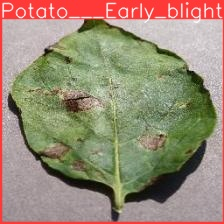

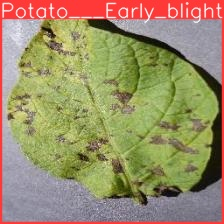

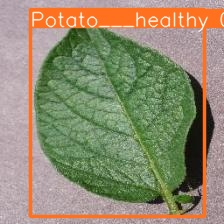

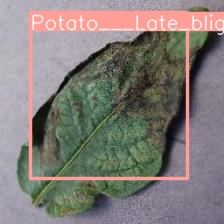

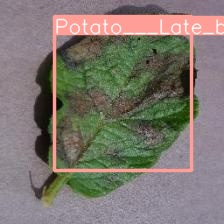

In [ ]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:5]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train4/")

View the status of your deployment at: https://app.roboflow.com/project-u0r7n/potato-plants-diseases/1
Share your model with the world at: https://universe.roboflow.com/project-u0r7n/potato-plants-diseases/model/1


In [ ]:
# Run inference on your model on a persistent, auto-scaling, cloud API

# Load model
model = project.version(dataset.version).model
assert model, "Model deployment is still loading"

# Choose a random test image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on d55f09eb-e463-4abd-aac6-fb144b30ead7___RS_Early-B-9004_JPG.rf.cebf88e19ffc07f3cb821af42088c50e.jpg


{'predictions': [{'x': 112.0,
   'y': 112.0,
   'width': 224.0,
   'height': 224.0,
   'confidence': 0.9927732944488525,
   'class': 'Potato___Early_blight',
   'class_id': 0,
   'detection_id': '8fd07ab6-1da5-40d6-b101-29400c0bf585',
   'image_path': '/content/Potato-Plants-Diseases-1/test/images/d55f09eb-e463-4abd-aac6-fb144b30ead7___RS_Early-B-9004_JPG.rf.cebf88e19ffc07f3cb821af42088c50e.jpg',
   'prediction_type': 'ObjectDetectionModel'}],
 'image': {'width': '224', 'height': '224'}}